## Limpieza de datos

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df_docentes_ = pd.read_csv("https://drive.google.com/uc?id=1Lac0jmlthX1KloRqFZl0SNN-j7r7TFts", sep=None, engine='python')

In [73]:
df_docentes = df_docentes_[(df_docentes_['COD_REG_RBD']==13) & 
                (df_docentes_['ESTADO_ESTAB']==1) &
                (df_docentes_['DC_TOT']>0)
                ]
# Imprimir nombres de columnas para verificar el BOM
# Reemplazar el BOM en el nombre de la columna
df_docentes.columns = df_docentes.columns.str.replace('\ufeff', '', regex=False)
df_docentes.drop(columns=['ESTADO_ESTAB','NOM_REG_RBD_A','AGNO', 'COD_DEPROV_RBD', 'NOM_DEPROV_RBD','DGV_RBD','COD_REG_RBD','COD_PRO_RBD','COD_DEPE2','COD_DEPE','COD_COM_RBD'], inplace=True)
# AGNO SE PUEDE IR ES REDUNDANTE SI TODOS LOS DATOS LOS SACAMOS DEL 2023
# COD_DEPROV_RBD
# NOM_DEPROV_RBD
# Creo que no es necesario saber el departamento al que pertenecen

C:\Users\catit\AppData\Local\Temp\ipykernel_6380\2260780922.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_docentes.drop(columns=['ESTADO_ESTAB','NOM_REG_RBD_A','AGNO', 'COD_DEPROV_RBD', 'NOM_DEPROV_RBD','DGV_RBD','COD_REG_RBD','COD_PRO_RBD','COD_DEPE2','COD_DEPE','COD_COM_RBD'], inplace=True)


In [75]:
df_docentes.shape

(2978, 36)

In [77]:
df_docentes.dtypes 

RBD              int64
NOM_RBD         object
NOM_COM_RBD     object
RURAL_RBD        int64
DC_A             int64
HH_A             int64
DC_UTP           int64
HH_UTP           int64
DC_PDIR          int64
HH_PDIR          int64
DC_DIR           int64
HH_DIR           int64
DC_OES           int64
HH_OES           int64
DC_OF            int64
HH_OF            int64
DC_JUTP          int64
HH_JUTP          int64
DC_IG            int64
HH_IG            int64
DC_OR            int64
HH_OR            int64
DC_DIR_SOST      int64
HH_DIR_SOST      int64
DC_TP_SOST       int64
HH_TP_SOST       int64
DC_SUP_SOST      int64
HH_SUP_SOST      int64
DC_SUBDIR        int64
HH_SUBDIR        int64
DC_PROF_ENC      int64
HH_PROF_ENC      int64
DC_EDUC_TRAD     int64
HH_EDUC_TRAD     int64
DC_TOT           int64
HH_TOT           int64
dtype: object

In [79]:
df_docentes.isnull().sum()  # Cantidad de NaN por columna

RBD             0
NOM_RBD         0
NOM_COM_RBD     0
RURAL_RBD       0
DC_A            0
HH_A            0
DC_UTP          0
HH_UTP          0
DC_PDIR         0
HH_PDIR         0
DC_DIR          0
HH_DIR          0
DC_OES          0
HH_OES          0
DC_OF           0
HH_OF           0
DC_JUTP         0
HH_JUTP         0
DC_IG           0
HH_IG           0
DC_OR           0
HH_OR           0
DC_DIR_SOST     0
HH_DIR_SOST     0
DC_TP_SOST      0
HH_TP_SOST      0
DC_SUP_SOST     0
HH_SUP_SOST     0
DC_SUBDIR       0
HH_SUBDIR       0
DC_PROF_ENC     0
HH_PROF_ENC     0
DC_EDUC_TRAD    0
HH_EDUC_TRAD    0
DC_TOT          0
HH_TOT          0
dtype: int64

In [81]:
(df_docentes == 0.0).sum()

RBD                0
NOM_RBD            0
NOM_COM_RBD        0
RURAL_RBD       2864
DC_A              43
HH_A              43
DC_UTP          2028
HH_UTP          2028
DC_PDIR         2037
HH_PDIR         2037
DC_DIR            67
HH_DIR            67
DC_OES          1574
HH_OES          1574
DC_OF           2838
HH_OF           2838
DC_JUTP         1573
HH_JUTP         1573
DC_IG           1793
HH_IG           1793
DC_OR           2353
HH_OR           2353
DC_DIR_SOST     2894
HH_DIR_SOST     2894
DC_TP_SOST      2727
HH_TP_SOST      2727
DC_SUP_SOST     2949
HH_SUP_SOST     2949
DC_SUBDIR       2725
HH_SUBDIR       2725
DC_PROF_ENC     2931
HH_PROF_ENC     2931
DC_EDUC_TRAD    2905
HH_EDUC_TRAD    2905
DC_TOT             0
HH_TOT             0
dtype: int64

In [83]:
(df_docentes == 0.0).sum().sum()

65738

In [97]:
zero_counts = (df_docentes == 0.0).sum()
zero_percentage = (zero_counts / len(df_docentes)) * 100
df_zero_percentage = zero_percentage.to_frame(name='percentage_zeros')
df_zero_percentage

,percentage_zeros
RBD,0.000000
NOM_RBD,0.000000
NOM_COM_RBD,0.000000
RURAL_RBD,96.171927
DC_A,1.443922
HH_A,1.443922
DC_UTP,68.099396
HH_UTP,68.099396
DC_PDIR,68.401612
HH_PDIR,68.401612


In [85]:
df_docentes.describe()

,RBD,RURAL_RBD,DC_A,HH_A,DC_UTP,HH_UTP,DC_PDIR,HH_PDIR,DC_DIR,HH_DIR,...,DC_SUP_SOST,HH_SUP_SOST,DC_SUBDIR,HH_SUBDIR,DC_PROF_ENC,HH_PROF_ENC,DC_EDUC_TRAD,HH_EDUC_TRAD,DC_TOT,HH_TOT
count,2978.000000,2978.000000,2978.000000,2978.000000,2978.000000,2978.00000,2978.000000,2978.000000,2978.000000,2978.000000,...,2978.000000,2978.000000,2978.000000,2978.000000,2978.000000,2978.000000,2978.000000,2978.000000,2978.000000,2978.000000
mean,18516.128274,0.038281,25.314305,939.123237,0.639019,25.63096,0.583949,23.979516,0.977837,40.859973,...,0.010745,0.396911,0.102754,4.258899,0.015782,0.647414,0.039624,1.468435,30.907992,1163.880457
std,8589.604698,0.191905,25.394832,969.429098,1.424030,58.44244,1.162265,49.041453,0.149501,8.933423,...,0.112468,4.515820,0.400100,16.945717,0.124654,5.200120,0.391085,15.042092,29.064433,1124.360027
min,8485.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000
25%,9998.250000,0.000000,7.000000,232.000000,0.000000,0.00000,0.000000,0.000000,1.000000,44.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,308.000000
50%,20340.500000,0.000000,19.000000,671.000000,0.000000,0.00000,0.000000,0.000000,1.000000,44.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,870.000000
75%,25789.500000,0.000000,35.000000,1322.750000,1.000000,44.00000,1.000000,44.000000,1.000000,44.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000,1646.000000
max,42162.000000,1.000000,246.000000,10796.000000,19.000000,828.00000,13.000000,550.000000,2.000000,88.000000,...,2.000000,88.000000,7.000000,289.000000,1.000000,44.000000,13.000000,548.000000,255.000000,11192.000000


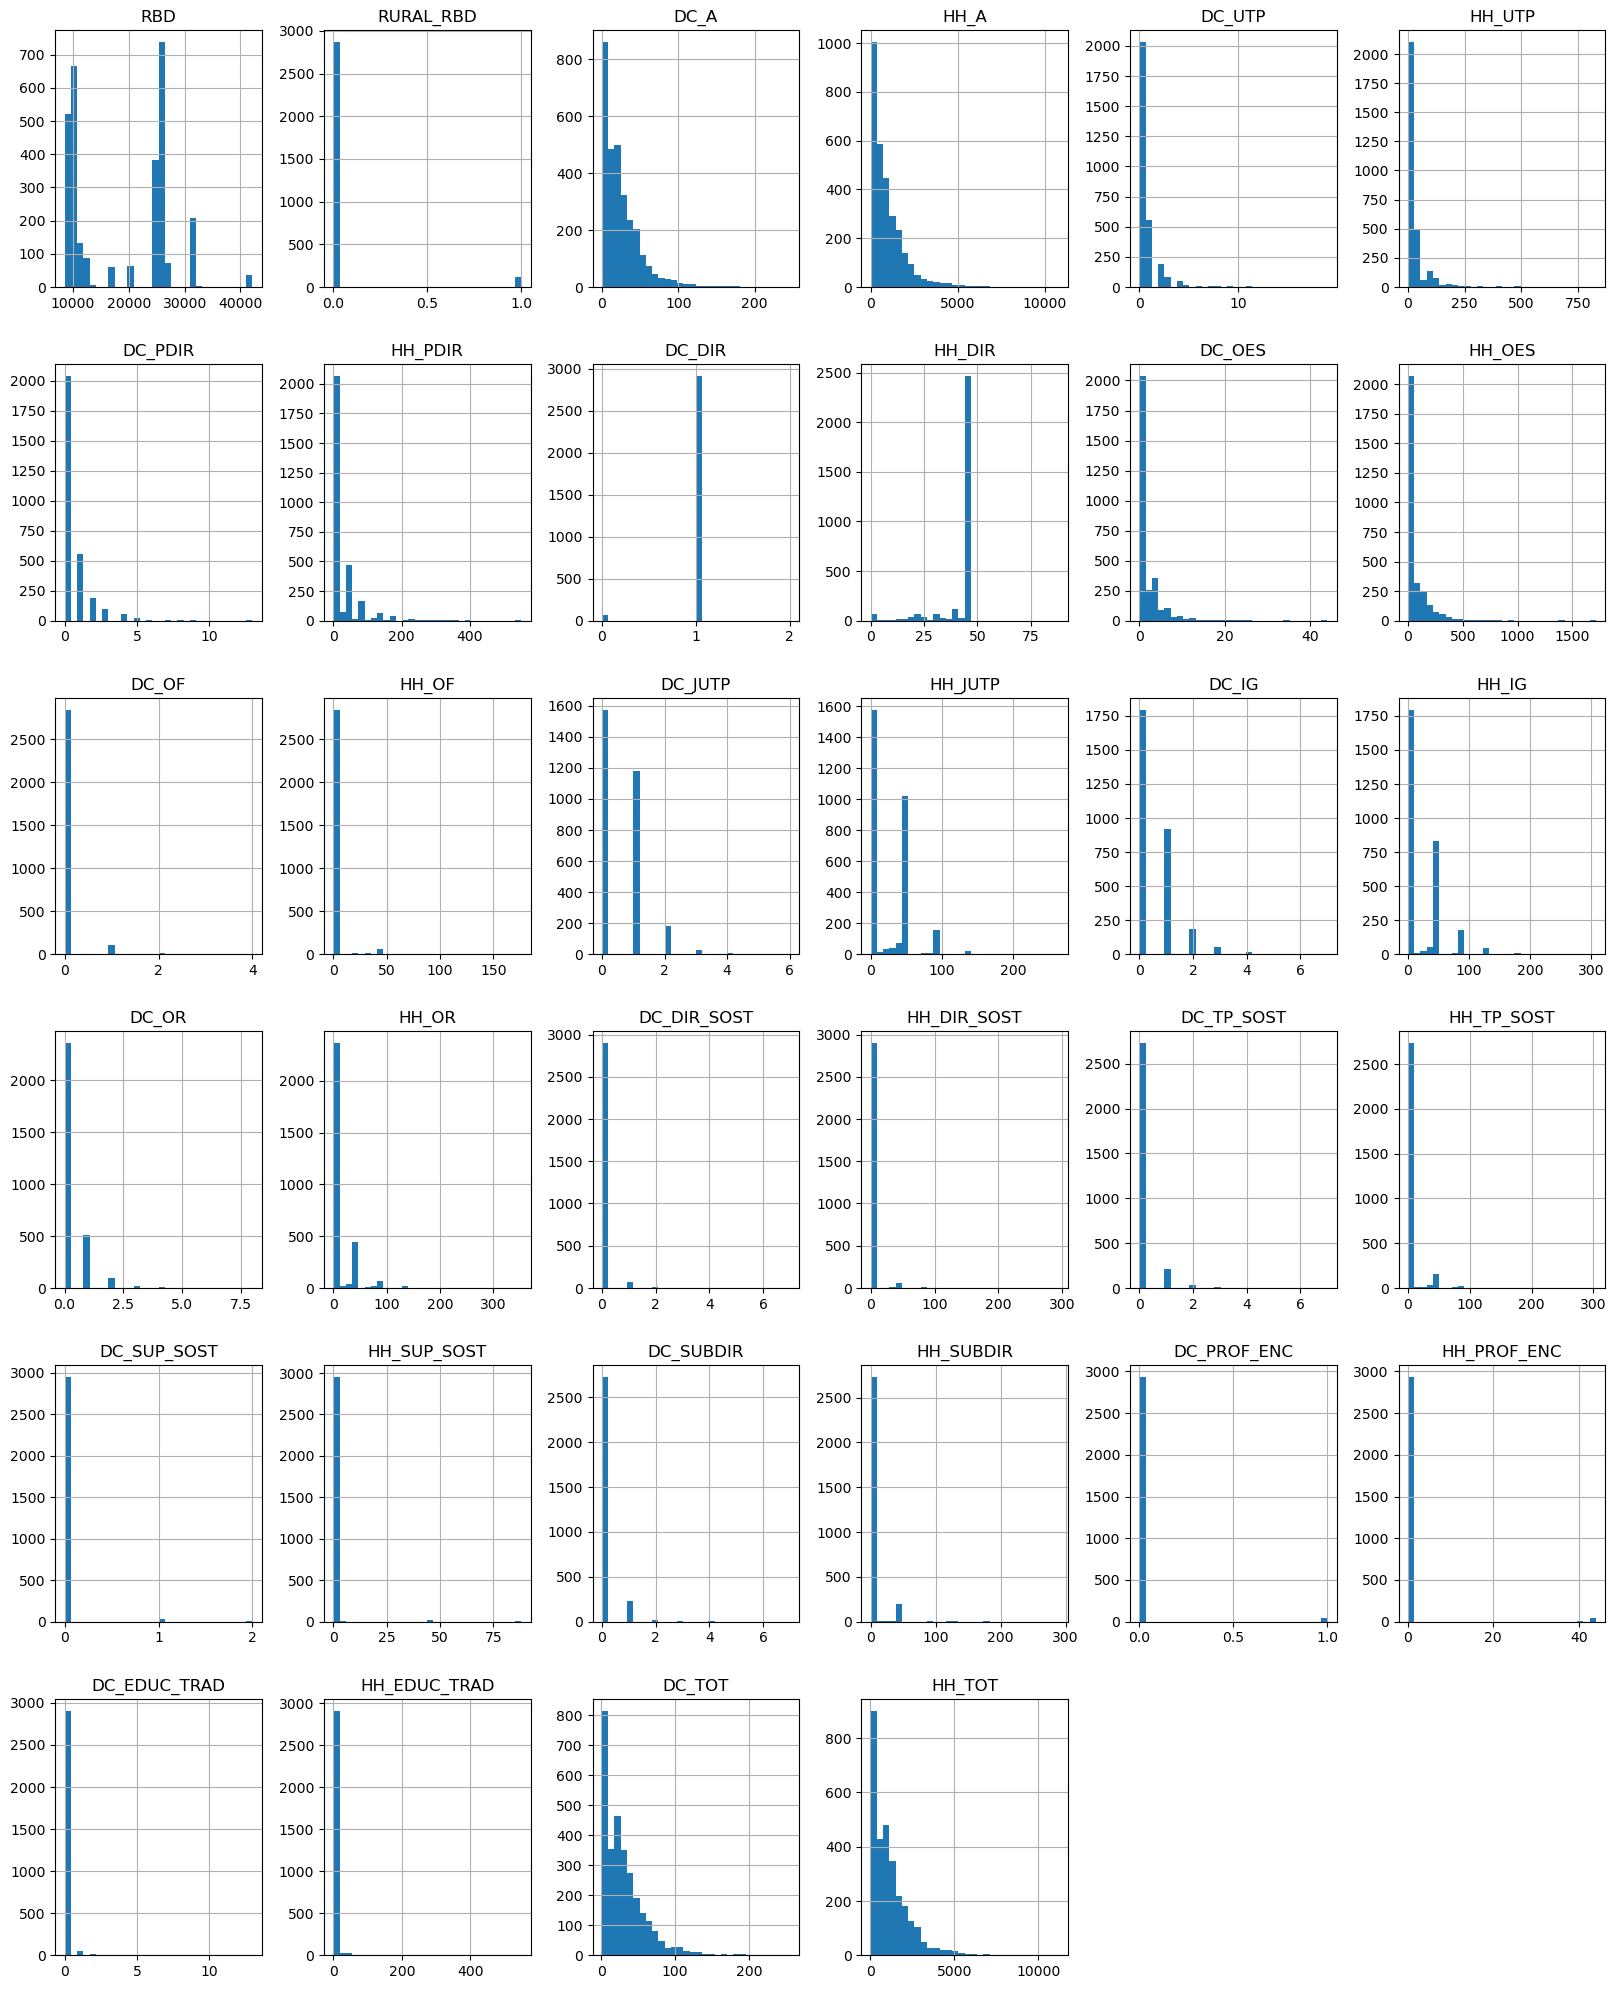

In [87]:
df_docentes.hist(bins=30, figsize=(20, 25)) 
plt.savefig('histograma_df_docentes.png', bbox_inches='tight')

<Axes: >

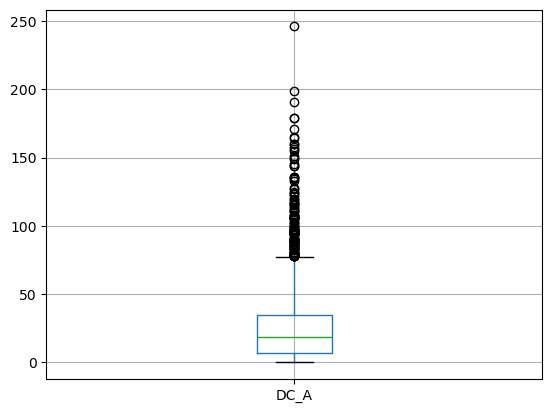

In [88]:
df_docentes.boxplot(column=['DC_A'])